# PRE-PROCESSING AND FEATURE ENGINEERING

Here we ensured that data were encoded properly before being send to the next step. Encoding was applied to both categorical and numerical features using one-hot encoding .get_dummies function.

Additional features were engineered as well according to intuitive understanding of the housing domain. Thereafter, all the features were investigated for their linearity to sale prices.

The resulting data set was then subjected to cross validation methods using Linear, Ridge and Lasso Regression to established a set of baseline scores. These scores shall be used in later steps to compare and determine the various model's performance and if any tuning require.

# Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


# setting some parameters
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

# Importing data from previous step

In [2]:
final_train_df = pd.read_csv('../datasets/final_train.csv')
print(final_train_df.shape)
final_train_df.head()

(2050, 28)


,MSSubClass,MSZoning,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,GarageType,Foundation,LotShape,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageCars,GrLivArea,GarageArea,1stFlrSF,YearBuilt,YearRemod/Add,FullBath,TotRmsAbvGrd,SalePrice
0,60,RL,Sawyer,2Story,HdBoard,Plywood,BrkFace,Attchd,CBlock,3,6,8,4,4,7,5,4,1,3,2.0,1479.0,475.0,725.0,1976,2005,2,6,130500
1,60,RL,SawyerW,2Story,VinylSd,VinylSd,BrkFace,Attchd,PConc,3,7,5,4,5,7,5,4,4,3,2.0,2122.0,559.0,913.0,1996,1997,2,8,220000
2,20,RL,NAmes,1Story,VinylSd,VinylSd,None,Detchd,CBlock,4,5,7,3,4,7,3,4,1,2,1.0,1057.0,246.0,1057.0,1953,2007,1,5,109000
3,60,RL,Timber,2Story,VinylSd,VinylSd,None,BuiltIn,PConc,4,5,5,3,5,2,4,3,1,4,2.0,1444.0,400.0,744.0,2006,2007,2,7,174000
4,50,RL,SawyerW,1.5Fin,Wd Sdng,Plywood,None,Detchd,PConc,3,6,8,3,3,2,3,3,1,2,2.0,1445.0,484.0,831.0,1900,1993,2,6,138500


In [3]:
final_train_df.columns

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'GarageType', 'Foundation', 'LotShape',
       'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GrLivArea', 'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemod/Add',
       'FullBath', 'TotRmsAbvGrd', 'SalePrice'],
      dtype='object')

In [4]:
# getting some data from code file 01_EDA and Cleaning.ipynb

cat_nominal_feat_list = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'SaleType']
cat_ordinal_feat_list = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
num_continuous_feat_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
num_discrete_feat_list = ['YearBuilt', 'YearRemod/Add', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
final_shortlist_feat_list = ['MSSubClass', 'MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'GarageType', 'Foundation', 'LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GrLivArea', 'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemod/Add', 'FullBath', 'TotRmsAbvGrd', 'SalePrice']

## One-Hot encoding on Categorical Nominal features with .get_dummies

Here we used pandas.get_dummies() on categorical nominal features.

In [5]:
# get the list of categorical nominal features still left in the final_train_df to get_dummies on
# print(cat_nominal_feat_list)
# print(final_train_df.columns)
dummy_list = []
for c in cat_nominal_feat_list:
    if c in final_train_df.columns:
        dummy_list.append(c)
print(dummy_list)
len(dummy_list)

['MSSubClass', 'MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType']


9

In [6]:
final_train_df.shape

(2050, 28)

In [7]:
# get dummies and assign back
final_train_df = pd.get_dummies(final_train_df, columns=dummy_list)

In [8]:
# check and confirm
print(final_train_df.shape)
final_train_df

(2050, 125)


,LotShape,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageCars,GrLivArea,GarageArea,1stFlrSF,YearBuilt,YearRemod/Add,FullBath,TotRmsAbvGrd,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,3,6,8,4,4,7,5,4,1,3,2.0,1479.0,475.0,725.0,1976,2005,2,6,130500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,3,7,5,4,5,7,5,4,4,3,2.0,2122.0,559.0,913.0,1996,1997,2,8,220000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,4,5,7,3,4,7,3,4,1,2,1.0,1057.0,246.0,1057.0,1953,2007,1,5,109000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,4,5,5,3,5,2,4,3,1,4,2.0,1444.0,400.0,744.0,2006,2007,2,7,174000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,3,6,8,3,3,2,3,3,1,2,2.0,1445.0,484.0,831.0,1900,1993,2,6,138500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,3,8,5,4,5,7,5,4,5,4,2.0,1728.0,520.0,1728.0,2007,2007,2,7,298751,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2046,3,4,5,3,4,5,5,3,1,2,2.0,861.0,539.0,861.0,1940,1950,1,4,82500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2047,4,6,6,3,4,2,4,3,4,2,2.0,1913.0,342.0,1172.0,1928,1950,1,9,177000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2048,4,4,5,3,4,4,3,3,5,2,1.0,1200.0,294.0,1200.0,1956,1956,1,6,144000,1,0,

## Feature engineering

Here we perform feature engineering on the remaining features, specifically the categorical nominals that were not taken care of by .get_dummies(). They are `YearBuilt` and `YearRemod/Add`.


1. `Year Remod/Add` (Discrete): Remodel date (same as construction date if no remodeling or additions)

We engineered `YearRemod/Add` into a categorical feature by replacing it with a new feature called `RemodHist`, of which the data value would be:

    - 1 if the value is not equal to YearBuilt (meaning a remod was done before)
    - 0 if the value is equal to YearBuilt (meaning no remod history).

This was based on the data dictionary description interpretation. We also added prefix fe_ to help in identifying engineered features.

2. `Year Built` (Discrete): Original construction date

We engineered `YearBuilt` into a continuous feature by replacing it with a new feature called `fe_Age`, which was the current year (2020) minus `YearBuilt`. Also added prefix fe_ to help in identifying engineered features.

In [9]:
# create new column fe_RemodHist
final_train_df["fe_RemodHist"] = final_train_df["YearBuilt"]
# assign the values
final_train_df.loc[(final_train_df["YearRemod/Add"] != final_train_df["YearBuilt"]), ["fe_RemodHist"]]=1
final_train_df.loc[(final_train_df["YearRemod/Add"] == final_train_df["YearBuilt"]), ["fe_RemodHist"]]=0
# drop the original
final_train_df.drop("YearRemod/Add", axis=1,inplace=True)

In [10]:
# check and confirm
final_train_df.fe_RemodHist.value_counts()

0    1101
1     949
Name: fe_RemodHist, dtype: int64

In [11]:
# create new fe_Age column, assign values and drop original
final_train_df["fe_Age"] = 2020 - final_train_df["YearBuilt"]
final_train_df.drop("YearBuilt", axis=1, inplace=True)

In [12]:
# check and confirm
final_train_df[["fe_Age"]].head()

,fe_Age
0,44
1,24
2,67
3,14
4,120


## Evaluating correlation of all features with SalePrice

Here we took the absolute correlation values of the features against SalePrice and selected only those that were more than 0.25. This was to avoid excessive removal of features too early in the process.

In [13]:
#Correlation with dependent variable
final_train_df_corr = final_train_df.corr()
cor_target = abs(final_train_df_corr["SalePrice"])

#Selecting highly correlated features Note: set at >0.25 to avoid over dropping too many features
relevant_features = cor_target[cor_target>0.25]

# generate a list of relevant features
print(len(relevant_features.sort_values(ascending=False)))
temp_list = relevant_features.sort_values(ascending=False).index.tolist()
print(temp_list)

31
['SalePrice', 'OverallQual', 'ExterQual', 'KitchenQual', 'GarageCars', 'GrLivArea', 'BsmtQual', 'GarageArea', '1stFlrSF', 'fe_Age', 'GarageFinish', 'FireplaceQu', 'FullBath', 'Foundation_PConc', 'TotRmsAbvGrd', 'HeatingQC', 'Neighborhood_NridgHt', 'MasVnrType_None', 'GarageType_Detchd', 'GarageType_Attchd', 'MSSubClass_60', 'Foundation_CBlock', 'BsmtFinType1', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_Stone', 'LotShape', 'MSZoning_RM', 'Neighborhood_NoRidge', 'MasVnrType_BrkFace', 'Neighborhood_StoneBr']


In [14]:
# create a temp df for heatmap plotting
temp_df = final_train_df[temp_list]
temp_df

,SalePrice,OverallQual,ExterQual,KitchenQual,GarageCars,GrLivArea,BsmtQual,GarageArea,1stFlrSF,fe_Age,GarageFinish,FireplaceQu,FullBath,Foundation_PConc,TotRmsAbvGrd,HeatingQC,Neighborhood_NridgHt,MasVnrType_None,GarageType_Detchd,GarageType_Attchd,MSSubClass_60,Foundation_CBlock,BsmtFinType1,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_Stone,LotShape,MSZoning_RM,Neighborhood_NoRidge,MasVnrType_BrkFace,Neighborhood_StoneBr
0,130500,6,4,4,2.0,1479.0,4,475.0,725.0,44,3,1,2,0,6,5,0,0,0,1,1,1,7,0,0,0,3,0,0,1,0
1,220000,7,4,4,2.0,2122.0,5,559.0,913.0,24,3,4,2,1,8,5,0,0,0,1,1,0,7,1,1,0,3,0,0,1,0
2,109000,5,3,4,1.0,1057.0,4,246.0,1057.0,67,2,1,1,0,5,3,0,1,1,0,0,1,7,1,1,0,4,0,0,0,0
3,174000,5,3,3,2.0,1444.0,5,400.0,744.0,14,4,1,2,1,7,4,0,1,0,0,1,0,2,1,1,0,4,0,0,0,0
4,138500,6,3,3,2.0,1445.0,3,484.0,831.0,120,2,1,2,1,6,3,0,1,1,0,0,0,2,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,298751,8,4,4,2.0,1728.0,5,520.0,1728.0,13,4,5,2,1,7,5,0,1,0,1,0,0,7,1,1,0,3,0,0,0,0
2046,82500,4,3,3,2.0,861.0,4,539.0,861.0,80,2,1,1,0,4,5,0,1,1,0,0,1,5,1,1,0,3,0,0,0,0
2047,177000,6,3,3,2.0,1913.0,4,342.0,1172.0,92,2,4,1,0,9,4,0,1,1,0,0,0,2,0,0,0,4,0,0,0,0
2048,144000,4,3,3,1.0,1200.0,4,294.0,1200.0,64,2,5,1,0,6,3,0,1,0,1,0,1,4,0,0,0,4,0,0,0,0


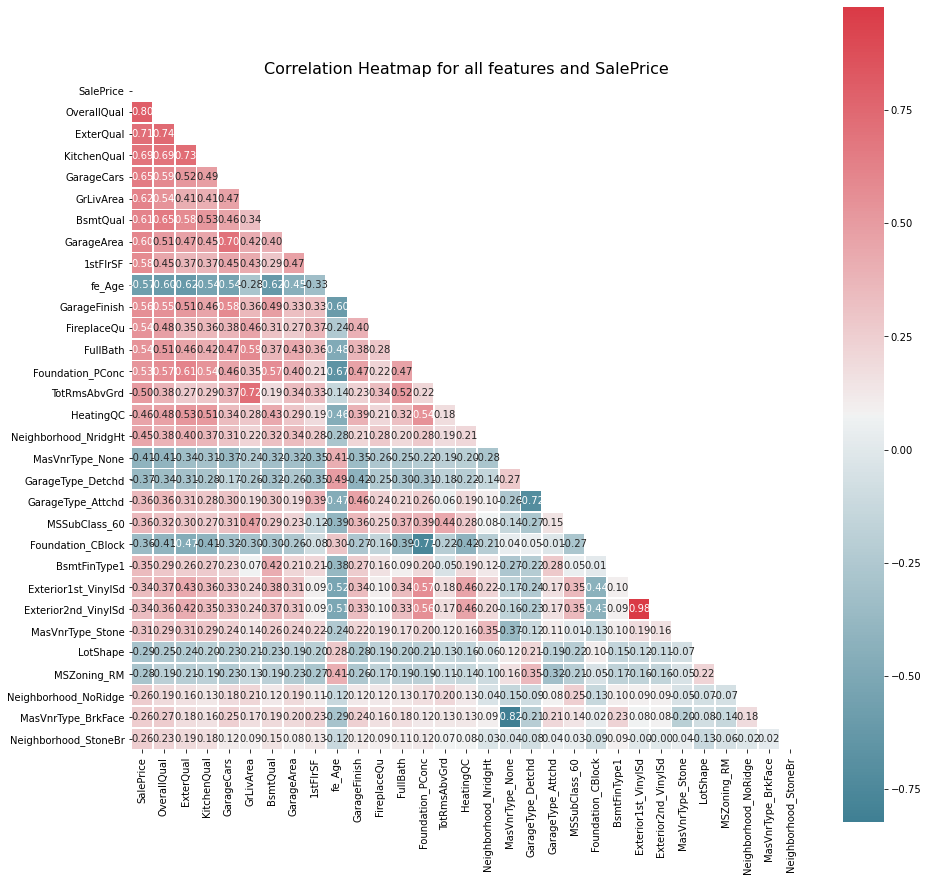

In [15]:
# plotting a heatmap to visualize correlations

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(15,15))
temp_df_corr = temp_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(temp_df_corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(temp_df_corr, mask=mask, square=True, annot=True, cmap=cmap,
            fmt=".2f", linewidths=.5, annot_kws={'fontsize' : 10});
plt.title("Correlation Heatmap for all features and SalePrice", fontsize=16)
plt.show()

**Observation**

From the heatmap we observed that there was a good spread of original and hot-encoded features, as well as the correlation between features and sale price. Two features stood out for their high correlation to each other, namely `Exterior2nd_VinylSd` vs `Exterior1st_VinylSd` (0.98); and `MasVnrType_BrkFAce` vs `MasVnrType_None` (-0.82). Although logically this was a good time to drop these features due to their high collinearity. We noticed that these were features engineered by .get_dummies function and each pair belonged to the same feature category. We decided to leave them as it is for now since it was only 4 features.

In [16]:
# update final features shortlist and final_train dataframe for baseline model
final_shortlist_feat_list = temp_list
final_train_df = final_train_df[final_shortlist_feat_list]
print(final_train_df.shape)
final_train_df.head()

(2050, 31)


,SalePrice,OverallQual,ExterQual,KitchenQual,GarageCars,GrLivArea,BsmtQual,GarageArea,1stFlrSF,fe_Age,GarageFinish,FireplaceQu,FullBath,Foundation_PConc,TotRmsAbvGrd,HeatingQC,Neighborhood_NridgHt,MasVnrType_None,GarageType_Detchd,GarageType_Attchd,MSSubClass_60,Foundation_CBlock,BsmtFinType1,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_Stone,LotShape,MSZoning_RM,Neighborhood_NoRidge,MasVnrType_BrkFace,Neighborhood_StoneBr
0,130500,6,4,4,2.0,1479.0,4,475.0,725.0,44,3,1,2,0,6,5,0,0,0,1,1,1,7,0,0,0,3,0,0,1,0
1,220000,7,4,4,2.0,2122.0,5,559.0,913.0,24,3,4,2,1,8,5,0,0,0,1,1,0,7,1,1,0,3,0,0,1,0
2,109000,5,3,4,1.0,1057.0,4,246.0,1057.0,67,2,1,1,0,5,3,0,1,1,0,0,1,7,1,1,0,4,0,0,0,0
3,174000,5,3,3,2.0,1444.0,5,400.0,744.0,14,4,1,2,1,7,4,0,1,0,0,1,0,2,1,1,0,4,0,0,0,0
4,138500,6,3,3,2.0,1445.0,3,484.0,831.0,120,2,1,2,1,6,3,0,1,1,0,0,0,2,0,0,0,3,0,0,0,0


# Baseline model scoring using cross validation

Before we continued to tune and select the best model. It was necessary to establish the performance scores of various models using the baseline features that were selected. We will be creating 3 baseline models using Linear, Ridge and Lasso Regression.

We did this using cross validation method which entailed testing the accuracy of our model on unseen data, then evaluating if it was an overfit or underfit model. Ideally, we wanted to find the ideal balance of bias and variance that will allow us to generalize well.

To aid in determining the overall "fitness" of our models and the magnitude of variances, we shall use R2 and RMSE as the metrics.

**Goal: Get $RMSE$ as close to 0 as possible.**

**Goal: Get $R^2$ as close to 1 as possible.**

Note that RMSE was the project goal stated. The graphic below shall serve to remind us of the goal of balancing bias and variance.

    - Bias is how bad your model is at predicting 𝑦
    - Variance is how bad your model is at generalizing to new data

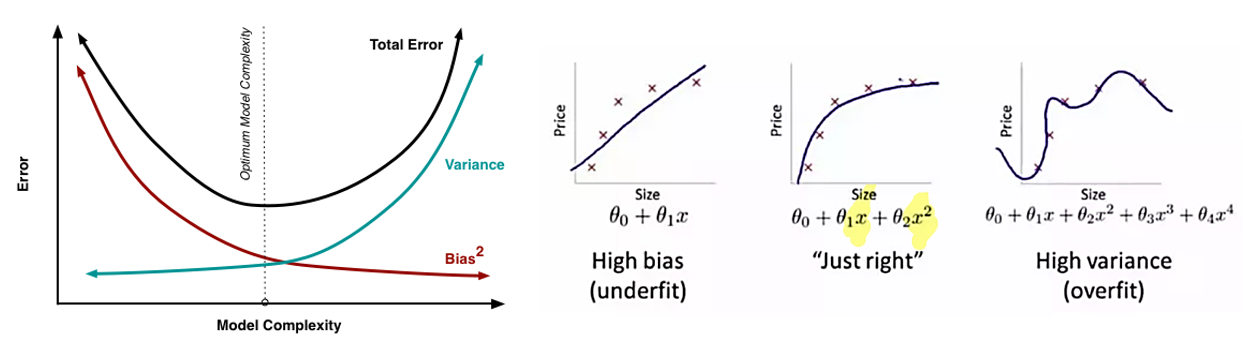

In [17]:
# set X and y
X_baseline = final_train_df.drop("SalePrice", axis=1, inplace=False)
y_baseline = final_train_df["SalePrice"]
print(X_baseline.shape)
print(y_baseline.shape)

(2050, 30)
(2050,)


## Baseline Linear Regression

In [18]:
# Instantiate
# LR model
lr=LinearRegression()

# Fit our model.
lr.fit(X_baseline, y_baseline)

LinearRegression()

In [19]:
print("Baseline model R2(LR) =", cross_val_score(lr, X_baseline, y_baseline, cv=5).mean())
#print("Baseline model MSE(LR) =", -cross_val_score(lr, X_baseline, y_baseline, cv=5, scoring='neg_mean_squared_error').mean())
print("Baseline model RMSE(LR) =", np.sqrt(-cross_val_score(lr, X_baseline, y_baseline, cv=5, scoring='neg_mean_squared_error').mean()))

Baseline model R2(LR) = 0.8247820594785032
Baseline model RMSE(LR) = 33261.34359491115


In [20]:
# coefficients
lr.coef_

array([ 1.24094675e+04,  1.35268485e+04,  1.34327101e+04,  4.97364393e+03,
        1.16252286e+01,  5.75139680e+03,  3.60042732e+01,  3.27774301e+01,
        8.40977403e+01,  3.16711925e+03,  3.58059689e+03,  1.01405695e+03,
       -4.05583069e+02,  5.69798477e+03,  2.10718829e+03,  3.64237954e+04,
        1.04423615e+04,  1.01190668e+03,  1.28862244e+02,  8.95451096e+03,
        2.17111863e+03,  3.38887841e+03, -1.69063322e+04,  1.52583637e+04,
        1.42894253e+04, -3.15181020e+03, -7.35607704e+03,  4.17906094e+04,
        9.03826679e+03,  5.60732483e+04])

In [21]:
# y intercept
lr.intercept_

-183653.19784531658

As there are too many coefficients, we gave an example of interpretation:

    saleprice = - 183653 + (1.2409 x feature1) + (1.353 x feature2) + .....

    with R2 = 0.82, RMSE = 33261

In [22]:
# Generate predictions.
y_preds = lr.predict(X_baseline)

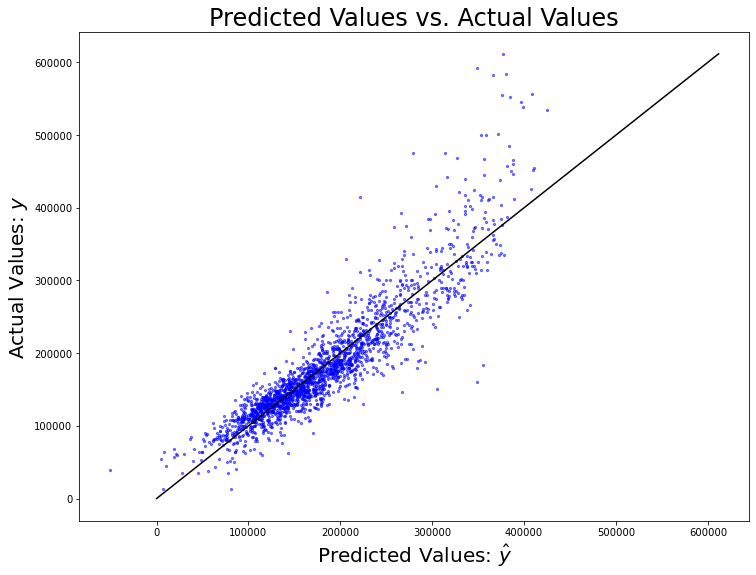

In [23]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y_baseline, s=5, color='blue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_baseline)],
         [0, np.max(y_baseline)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

**Observation**

The model did not look very strong here, there were poor predictions and outliers as actual values increased. It appear to be underpredicting or overpredicting as actual values increases. This impled that there was Heteroscedasticity and this baseline model was getting worse for larger predicted value and it is perhaps only good for only a portion of our data. Henceforth the need to find a better model.

## Interpreting Baseline Score

|Model Type|Validation Method|R2|RMSE|
|:---|:---|:---|:---|
|Baseline (Unseen data)|LR cross validation|       0.8248 | 	 33,261|

Baseline models are often expected to be the most liberal and lacking so in theory, whatever models we tuned and used for production, must be performing better than these baseline models.

Looking at 𝑅2, we could interpret this as 𝑅2 value of 0.82 means around 82% of the variability in sale price was explained by the x-features in our model. It is however, important to note that 𝑅2 is ONLY INTERPRETABLE WITH LINEAR REGRESSION.

It is hard to judge what would be a good 𝑅2 range at this point as the features may very well change as we proceed. 

**Thus, for Baseline comparison, we can expect a 𝑅2 score around 0.82 (tolerance +/- 5%) and RMSE score to be lower since the key measurement metric of this project was RMSE.**

# Exporting data to next step (final_train_df dataset to a csv file)

In [24]:
# piecing the dataframe together with saleprice column
final_train_df = pd.concat([X_baseline, y_baseline], axis=1, join='inner')
final_train_df.rename(columns={0 : "SalePrice"}, inplace=True)
print(final_train_df.shape)
final_train_df.head()

(2050, 31)


,OverallQual,ExterQual,KitchenQual,GarageCars,GrLivArea,BsmtQual,GarageArea,1stFlrSF,fe_Age,GarageFinish,FireplaceQu,FullBath,Foundation_PConc,TotRmsAbvGrd,HeatingQC,Neighborhood_NridgHt,MasVnrType_None,GarageType_Detchd,GarageType_Attchd,MSSubClass_60,Foundation_CBlock,BsmtFinType1,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_Stone,LotShape,MSZoning_RM,Neighborhood_NoRidge,MasVnrType_BrkFace,Neighborhood_StoneBr,SalePrice
0,6,4,4,2.0,1479.0,4,475.0,725.0,44,3,1,2,0,6,5,0,0,0,1,1,1,7,0,0,0,3,0,0,1,0,130500
1,7,4,4,2.0,2122.0,5,559.0,913.0,24,3,4,2,1,8,5,0,0,0,1,1,0,7,1,1,0,3,0,0,1,0,220000
2,5,3,4,1.0,1057.0,4,246.0,1057.0,67,2,1,1,0,5,3,0,1,1,0,0,1,7,1,1,0,4,0,0,0,0,109000
3,5,3,3,2.0,1444.0,5,400.0,744.0,14,4,1,2,1,7,4,0,1,0,0,1,0,2,1,1,0,4,0,0,0,0,174000
4,6,3,3,2.0,1445.0,3,484.0,831.0,120,2,1,2,1,6,3,0,1,1,0,0,0,2,0,0,0,3,0,0,0,0,138500


In [25]:
final_train_df.to_csv('../datasets/final_train_df.csv', index=False)

## We will continue in the next code file so we don't have to keep waiting for re-run processing of plots everytime.

In [26]:
final_train_df.shape

(2050, 31)